###Author : Mohamed Khalil
###Task 2 : Prediction using Unsupervised Machine Learning
###GRIP @ The Sparks Foundation

From the given 'Iris' dataset. Predict the optimum number of clusters and represent it visually

Note: Iris setosa has a deep violet blue flower. The sepals are deeply-veined dark purple with a yellow-white signal. The petals are very reduced in size, not exceeding the base of the sepals.

###**Technical Stack**

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


###**Reading the data from the source**

In [ ]:
url = "https://bit.ly/3cGyP8j"
df = pd.read_csv(url)
print("Importing Data Successfully")


df.head()

Importing Data Successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Drop Id column
df.drop(columns=['Id'], inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Finding the optimum number of clusters for k-means classification


In [ ]:
x = df.iloc[:, [0,1,2,3]].values

# Within-Cluster Sum of Square
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

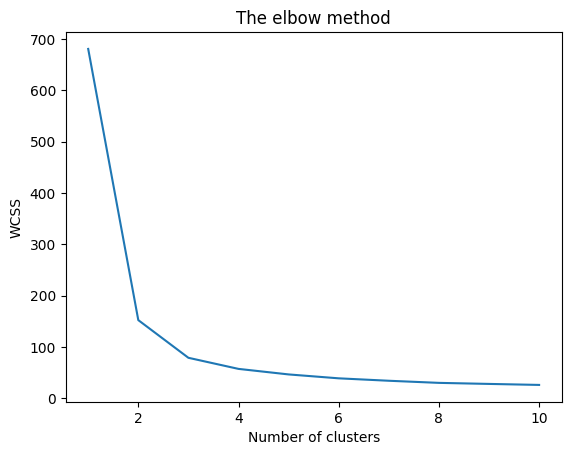

In [ ]:
# Plotting the results onto a line graph,
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

we can clearly see using "elbow method" from the above graph, the optimum </br>
cluster is where the elbow occurs. From this we choose the number of clusters as 3

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
df["Clustre"] = y_kmeans
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clustre
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [ ]:
df.groupby(['Clustre','Species']).agg(count=('Clustre','count')).sort_values(by=['count'], ascending=False)

,,count
Clustre,Species,
1,Iris-setosa,50
0,Iris-versicolor,48
2,Iris-virginica,36
0,Iris-virginica,14
2,Iris-versicolor,2


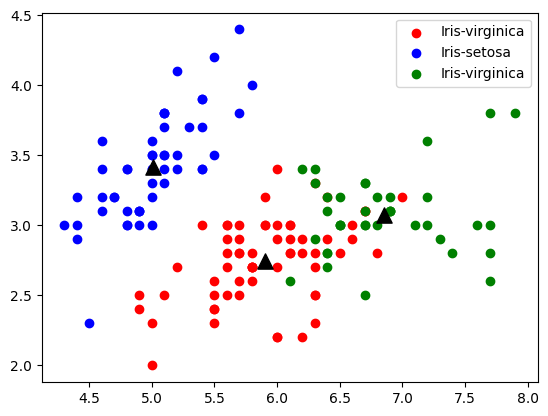

In [ ]:
# Visualising the clusters - On the first two columns

# color
color = ['red', 'blue', 'green']
# Species Dictinary as indexed with it's Clusters number
Species = df[['Clustre','Species']].drop_duplicates().set_index('Clustre').to_dict()['Species']

# draw the plot dynamically
for i in range(0,3):
    plt.scatter(x[y_kmeans == i, 0],
                x[y_kmeans == i, 1],
                c=color[i],
                label= Species[i]
                )

# Draw centroid
for center in kmeans.cluster_centers_:
  plt.scatter(center[0],center[1], marker = '^', c = 'black',s=120)


plt.legend()
plt.show()


### Thanks